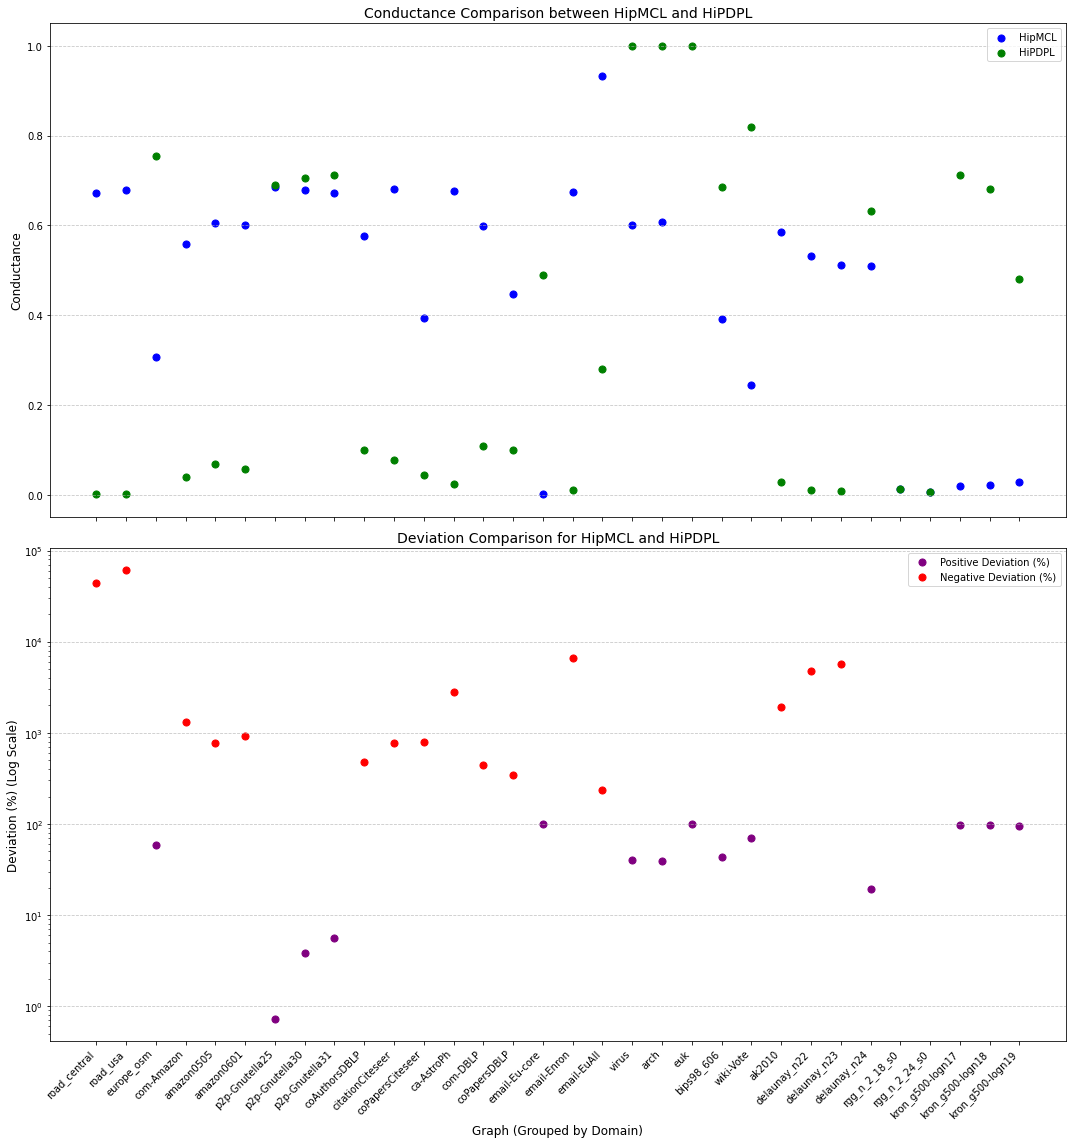

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = 'conductance_values.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Define the custom domain order
custom_domain_order = ["Road", "Consumer", "Internet", "Citation", "Collaboration", 
                       "Communication", "Protein", "Other", "Delaunay", "Rgg", "Rmat"]

# Set the custom order for domains and sort by domain and edges
df['domain'] = pd.Categorical(df['domain'], categories=custom_domain_order, ordered=True)
df = df.sort_values(by=['domain', 'edges'])

# Separate positive and negative deviation values
positive_deviation = df['deviation'].apply(lambda x: x if x > 0 else np.nan)
negative_deviation = df['deviation'].apply(lambda x: -x if x < 0 else np.nan)  # Invert negatives for log scale

# Initialize subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16), sharex=True)

# First subplot: Conductance values for HipMCL and HiPDPL
ax1.scatter(df['graph'], df["hipmcl_conductance"], color="blue", label="HipMCL", s=50)
ax1.scatter(df['graph'], df["hipdpl_conductance"], color="green", label="HiPDPL", s=50)
ax1.set_ylabel("Conductance", fontsize=12)
ax1.set_title("Conductance Comparison between HipMCL and HiPDPL", fontsize=14)
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Second subplot: Deviation percentages with log scale for positive and negative separately
ax2.scatter(df['graph'], positive_deviation, color="purple", label="Positive Deviation (%)", s=50)
ax2.scatter(df['graph'], negative_deviation, color="red", label="Negative Deviation (%)", s=50)
ax2.set_yscale('log')  # Log scale for both positive and inverted negative deviations
ax2.set_ylabel("Deviation (%) (Log Scale)", fontsize=12)
ax2.set_title("Deviation Comparison for HipMCL and HiPDPL", fontsize=14)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(axis="y", linestyle="--", alpha=0.7)

# Set x-axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.xlabel("Graph (Grouped by Domain)", fontsize=12)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("conductance_and_deviation_split_log_comparison.pdf", format="pdf")
plt.show()
